# Hello Krish Sir, I had this doubt in this pre trained model( transfer learning for multiclassclassification) as follows
# Model accuracy is above 90% , but while manually selecting picture for prediction the value is coming false thus giving wrong output.( I have mentioned below sir)

In [ ]:
## import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d kaustubhb999/tomatoleaf

tomatoleaf.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "tomatoleaf.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#Give dataset path
train_path = '/content/tomato/train'
test_path = '/content/tomato/val'

In [ ]:
#using inception v3 model for training 
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg =             VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=Fals

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/tomato/val/*')

In [ ]:
len(folders)

10

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
resnet.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)


In [ ]:
model_rs = Model(inputs=resnet.input, outputs=prediction)
model_rs.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

# Creating Model Object

In [ ]:
x = Flatten()(inception.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Image Augmentation

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test dataset

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/tomato/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


# Training Our Model

In [ ]:
r = model.fit_generator(
  raining_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validatio
  n_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
313/313 [==============================] - 180s 469ms/step - loss: 3.1365 - accuracy: 0.6529 - val_loss: 2.4204 - val_accuracy: 0.6860
Epoch 2/30
313/313 [==============================] - 142s 455ms/step - loss: 2.0322 - accuracy: 0.7660 - val_loss: 3.1733 - val_accuracy: 0.6910
Epoch 3/30
313/313 [==============================] - 141s 451ms/step - loss: 2.0717 - accuracy: 0.7991 - val_loss: 2.9821 - val_accuracy: 0.7540
Epoch 4/30
313/313 [==============================] - 140s 448ms/step - loss: 1.8543 - accuracy: 0.8276 - val_loss: 3.4746 - val_accuracy: 0.7510
Epoch 5/30
313/313 [==============================] - 141s 449ms/step - loss: 1.6566 - accuracy: 0.8441 - val_loss: 2.9723 - val_accuracy: 0.7830
Epoch 6/30
313/313 [==============================] - 139s 444ms/step - loss: 1.5040 - accuracy: 0.8616 - val_loss: 3.7894 - val_accuracy: 0.7440
Epoch 7/30
313/313 [==============================] - 138s 441ms/step - loss: 1.6936 - accuracy: 0.8538 - val_loss: 4.2075 -

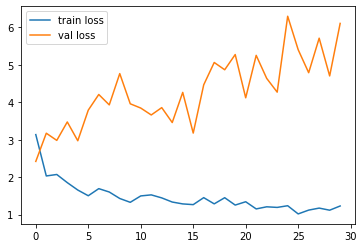

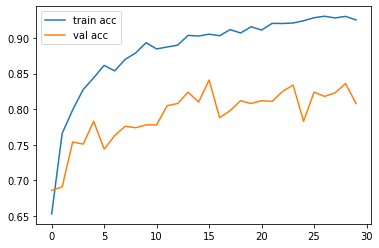

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('modeltomato_inception.h5')

# Sir , here I APPLIEd Model.predict to complete dataset and i am getting true results of multiclass classification, but problem comes when I manually input image to model for getting values and it,s giving wrong values
 

In [ ]:
y_pred = model.predict(test_set)
y_pred                       

array([[2.6169438e-27, 1.1757107e-30, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.9191672e-27],
       [9.5529328e-21, 3.3081964e-12, 0.0000000e+00, ..., 0.0000000e+00,
        1.3464187e-28, 1.7599604e-32],
       [0.0000000e+00, 8.4673749e-27, 1.4619210e-26, ..., 0.0000000e+00,
        4.1948581e-25, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.3247663e-31,
        9.8335408e-02, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([6, 6, 3, 8, 4, 4, 5, 7, 4, 8, 8, 7, 9, 1, 4, 5, 2, 7, 8, 5, 3, 8,
       8, 5, 2, 8, 4, 7, 5, 8, 3, 3, 5, 3, 9, 6, 0, 1, 1, 5, 6, 9, 2, 3,
       3, 4, 6, 1, 8, 3, 8, 5, 2, 3, 6, 7, 0, 1, 4, 2, 1, 5, 0, 9, 2, 9,
       0, 7, 1, 1, 2, 3, 4, 2, 9, 4, 9, 3, 9, 6, 5, 5, 4, 3, 5, 5, 6, 6,
       2, 9, 2, 1, 5, 6, 6, 5, 2, 5, 1, 7, 0, 4, 5, 1, 8, 0, 0, 8, 3, 0,
       4, 8, 7, 4, 5, 2, 8, 4, 2, 8, 2, 2, 3, 5, 5, 4, 2, 0, 5, 7, 1, 2,
       5, 0, 9, 4, 9, 7, 7, 9, 6, 7, 0, 3, 1, 8, 4, 0, 4, 3, 8, 8, 6, 9,
       4, 7, 7, 2, 3, 3, 5, 3, 1, 0, 9, 7, 2, 8, 2, 1, 1, 5, 1, 3, 4, 7,
       5, 8, 8, 2, 1, 0, 0, 3, 2, 2, 6, 2, 3, 5, 4, 1, 1, 0, 4, 6, 4, 6,
       4, 6, 5, 1, 4, 0, 5, 0, 4, 5, 8, 3, 1, 0, 3, 2, 9, 1, 2, 9, 8, 8,
       7, 0, 1, 9, 0, 1, 4, 9, 0, 1, 9, 8, 8, 9, 6, 8, 7, 4, 6, 1, 7, 8,
       4, 5, 8, 5, 8, 3, 1, 9, 3, 4, 0, 8, 1, 0, 2, 2, 9, 5, 2, 4, 1, 8,
       8, 6, 0, 8, 8, 7, 8, 4, 6, 2, 2, 6, 4, 3, 4, 4, 9, 1, 0, 5, 8, 3,
       5, 2, 7, 7, 7, 9, 7, 5, 0, 4, 3, 5, 0, 8, 5,

# Sir You can see here , that I am gettingwrong values for the image i selected. The dataset is tomato dataset

I hope Sir you help me iN THIS regard, cuz am stuck in other models too having same issue

In [ ]:
def predict_tomato_disease(img):
    plt.figure(figsize=(40,8))
    print('Prediction of Cotton Disease:')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)

    print(np.argmax(model.predict(img_data)))

In [ ]:
img=image.load_img('/content/tomato/val/Tomato___Late_blight/00ce4c63-9913-4b16-898c-29f99acf0dc3___RS_Late.B 4982.JPG',target_size=(224,224))

Prediction of Cotton Disease:

2


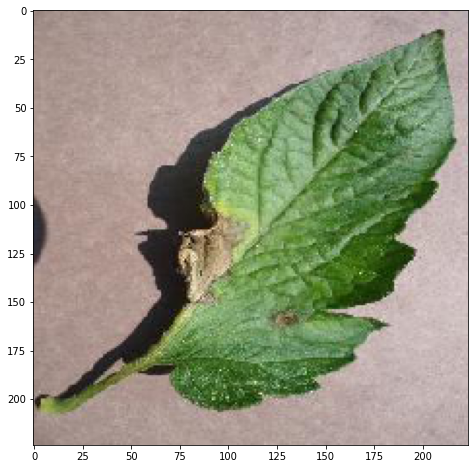

In [ ]:
predict_tomato_disease(img)

Prediction of Cotton Disease:

2


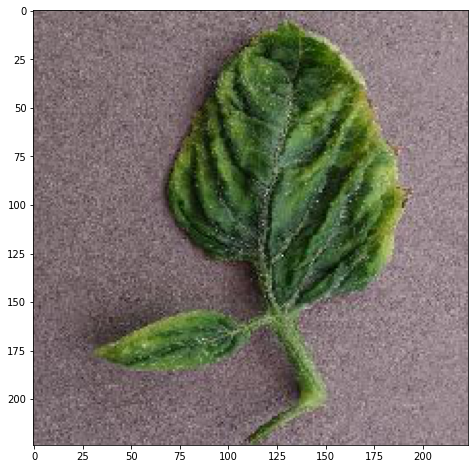

In [ ]:
img_1=image.load_img('/content/tomato/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1af07f2b-027b-4792-80c5-2c20a4ed538c___YLCV_NREC 0179.JPG',target_size=(224,224))
predict_tomato_disease(img_1)

Prediction of Cotton Disease:

1


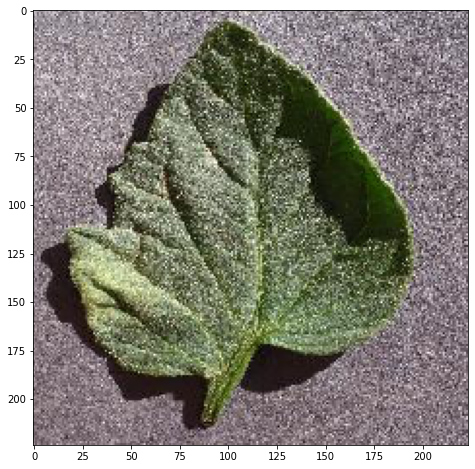

In [ ]:
img_2=image.load_img('/content/tomato/val/Tomato___healthy/0a0d6a11-ddd6-4dac-8469-d5f65af5afca___RS_HL 0555.JPG',target_size=(224,224))
predict_tomato_disease(img_2)

Prediction of Cotton Disease:

1


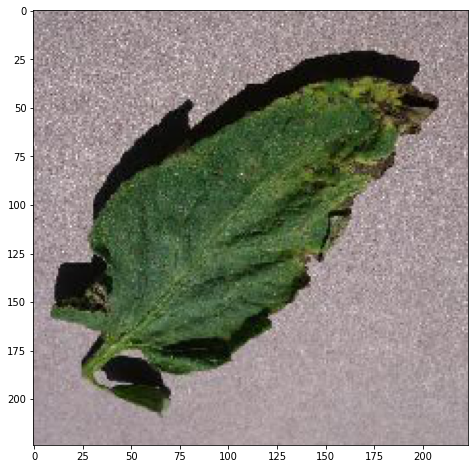

In [ ]:
img_3=image.load_img('/content/tomato/val/Tomato___Septoria_leaf_spot/02b079eb-8c74-42bf-b956-d3aecdb9d4ad___JR_Sept.L.S 8522.JPG',target_size=(224,224))
predict_tomato_disease(img_3)

Prediction of Cotton Disease:

2


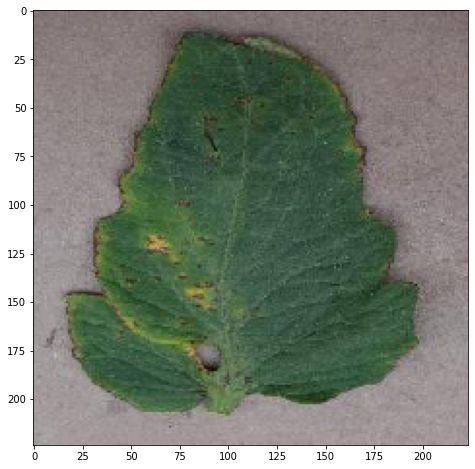

In [ ]:
img_4=image.load_img('/content/tomato/val/Tomato___Bacterial_spot/0ad66523-0fca-464d-a6e9-ca2d629e8058___GCREC_Bact.Sp 5945.JPG',target_size=(224,224))
predict_tomato_disease(img_4)